<center><h1>Particle Swarm Optimization</h1></center>
<center><h2>Objective: Find the Global Minima for the Objective function.</h2></center>

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt


## Function for computing the function value:
### List of objective functions:
#### 1.) Ackley
#### 2.) Beale
#### 3.) Booth
#### 4.) Cross-in-Tray
#### 5.) Easom
#### 6.) Goldstein-Price
#### 7.) Himmelblau
#### 8.) Holder Table
#### 9.) Matyas
#### 10.) Schaffer2
#### 11.) ThreeHump Camel
#### 12.) Eggholder

In [47]:
#function to find z value
def fin_z(x_, y_,ind):
    if (ind == 1):  #ackley [-10,10]
        z_i = -20* np.exp(-0.2* np.sqrt(0.5* (x_**2 + y_**2))) - np.exp(0.5* (np.cos(2* np.pi* x_) + (np.cos(2* np.pi* y_)))) + np.exp(1) + 20   
    elif (ind == 2):    #beale [-4.5,4.5]
        z_i =  (1.5 - x_ + x_ * y_) ** 2.0 + (2.25 - x_ + x_ * y_ ** 2.0) ** 2.0 + (2.625 - x_ + x_ * y_ ** 3.0) ** 2.0
    elif (ind == 3):    #booth  [-10,10]
        z_i = (x_ + 2 * y_ - 7) ** 2.0 + (2 * x_ + y_ - 5) ** 2.0 
    elif (ind == 4):    #cross-in-tray [-5,5]  #4 optimas
        z_i = -0.0001 * np.power(np.abs( np.sin(x_) * np.sin(y_)* np.exp(np.abs(100 - (np.sqrt(x_ ** 2 + y_ ** 2) / np.pi))))  + 1,  0.1,)
    elif (ind == 5):    #easom [2,4]
        z_i =(-1 * np.cos(x_)* np.cos(y_)* np.exp(-1 * ((x_ - np.pi) ** 2 + (y_ - np.pi) ** 2)))
    elif (ind == 6):    #goldstein [-2,2]
        z_i = (1 + (x_ + y_ + 1) ** 2.0* (19 - 14 * x_+ 3 * x_ ** 2.0- 14 * y_+ 6 * x_ * y_+ 3 * y_ ** 2.0)) * (30+ (2 * x_ - 3 * y_) ** 2.0*(18 - 32 * x_+ 12 * x_ ** 2.0 + 48 * y_- 36 * x_ * y_ + 27 * y_ ** 2.0))    
    elif (ind == 7):    #himmelblau [-4,4]   #4 optimas
        z_i = (x_ ** 2 + y_ - 11) ** 2 + (x_ + y_ ** 2 - 7) ** 2 
    elif (ind == 8):    #holder table [-10,10]   #4 optimas
        z_i = -np.abs(np.sin(x_)* np.cos(y_)* np.exp(np.abs(1 - np.sqrt(x_ ** 2 + y_ ** 2) / np.pi))) 
    elif (ind == 9):    #matyas [-10,10]
        z_i = 0.26 * (x_ ** 2.0 + y_ ** 2.0) - 0.48 * x_ * y_
    elif (ind == 10):   #schaffer2 [-7.5,7.5]
        z_i = 0.5 + ((np.sin(x_ ** 2.0 - y_ ** 2.0) ** 2.0 - 0.5)/ ((1 + 0.001 * (x_ ** 2.0 + y_ ** 2.0)) ** 2.0))
    elif (ind == 11):   #3 hump camel [-2,2]
        z_i = 2 * x_ ** 2 - 1.05 * (x_ ** 4) + (x_ ** 6) / 6 + x_ * y_ + y_ ** 2
    elif (ind == 12):   #eggholder [0,512]
        z_i = -(y_ + 47) * np.sin(np.sqrt(np.abs((x_ / 2) + y_ + 47))) - x_ * np.sin(np.sqrt(np.abs(x_ - (y_ + 47))))
    else:
        print("Invalid index")
    return z_i


### Population size = 100;
### Search space: [blo, bup];
### Weights:
   #### Current velocity: omg = 0.05;
   #### Self best position: phi_p = 0.5;
   #### Global best position: phi_g = 1
### Note: Change the 'ind' value to select the function from the list of functions.   

In [48]:
#parameters
bounds = np.array(np.mat('-10 10;-4.5 4.5;-10 10;-5 5;2 4;-2 2;-4 4;-10 10;-10 10;-7.5 7.5;-2 2;0 512'))  #search space bounds
ind = 7   #function index
[blo,bup] = bounds[ind-1,:]  #search space bounds for the selected function
omg = 0.05
phi_p = 0.5
phi_g = 1
S = 100      # No of particles in the swarm
x = np.zeros((2,S)) #position
v = np.zeros((2,S)) #velocity
p = np.zeros((2,S)) #best position of particle
g = np.zeros((2)) #best position of swarm
maxItr = 10

z_p = np.zeros((S,S))           #To plot contour
x_p = np.linspace(blo, bup, S)
y_p = np.linspace(blo, bup, S)

for i in range(0, S):
    for j in range(0, S):
        z_p[i,j] = fin_z(x_p[i], y_p[j],ind)   #used to plot contour


## Initialization:

In [49]:
#initialization
for i in range(0,S):
    x[0,i] = (bup - blo)*np.random.random(1) + blo       #Initialize the particle’s position
    x[1,i] = (bup - blo)*np.random.random(1) + blo
    
    p[:,i] = x[:,i]                                     #Initialize the particle’s best known position
    
    if fin_z(p[0,i], p[1,i],ind) < fin_z(g[0], g[1],ind):       #update the swarm’s best known position
        g[:] = p[:,i]
    
    low = np.abs(bup - blo)                             #Initialize the particle’s velocity
    high = -np.abs(bup - blo)
    v[0,i] = (high - low)*np.random.random(1) + low
    v[1,i] = (high - low)*np.random.random(1) + low

## Algorithm:

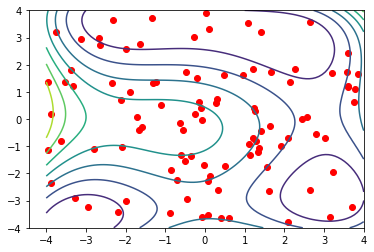

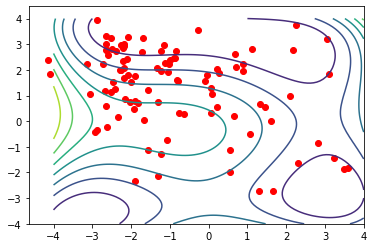

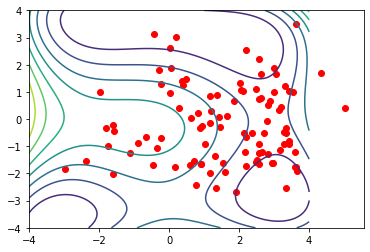

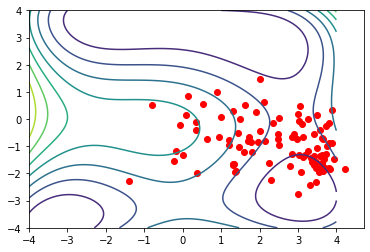

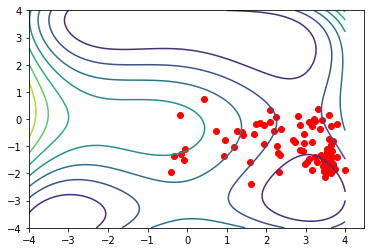

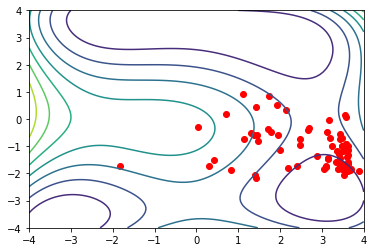

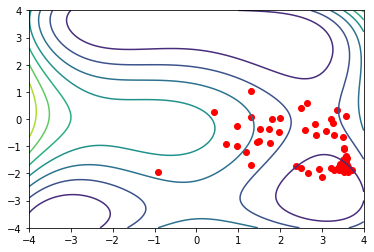

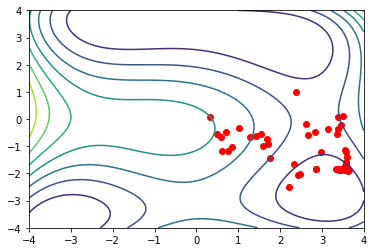

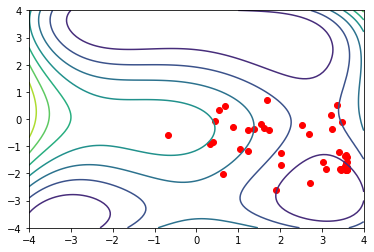

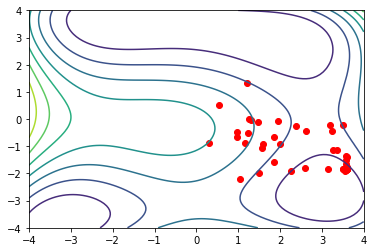

In [50]:
itr = 0
#main loop starts
while itr < maxItr:
    #plt.clf()
    plt.contour(x_p, y_p, z_p)       #plot contour and scattered points
    plt.scatter(x[0,:], x[1,:], c = 'r')
    #plt.show()
    plt.pause(1)
    for i in range(0,S):           # Update the particle’s velocity
        for d in range(0,2):
            rp = np.random.random(1)
            rg = np.random.random(1)
            v[d,i] = omg* v[d,i] + phi_p* rp* (p[d,i] - x[d,i]) + phi_g* rg* (g[d] - x[d,i])
        
        x[:,i] = x[:,i] + v[:,i]   #Update the particle’s position
        
        if fin_z(x[0,i], x[1,i],ind) < fin_z(p[0,i], p[1,i],ind): #Update the particle’s best known position
            p[:,i] = x[:,i]
            if fin_z(p[0,i], p[1,i],ind) < fin_z(g[0], g[1],ind): #Update the swarm’s best known position
                g[:] = p[:,i]
    itr += 1

## Result:

In [51]:
print(g[:])  #optima

[ 3.58439733 -1.84809153]
